In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Let's get some general info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#We can see we have equal number of non null values for all variables except bmi. 
#We will need to take away any null values.

# drop all rows with any NaN and NaT values
df1 = df.dropna()

#check info of new dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [6]:
#Perfect now we have only non-null values, now let's get some overall statistics 
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

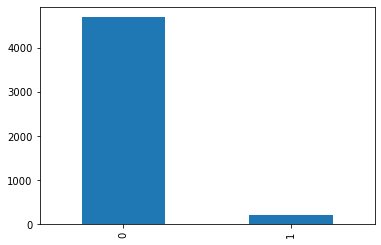

In [7]:
sizes = df1['stroke'].value_counts(sort = True)
ax = plt.figure()
sizes.plot(kind='bar')

In [8]:
#Plot shows we have a lot more of patients that did not have stroke (0) than did have stroke (1)

<AxesSubplot:>

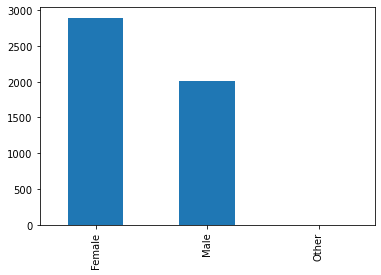

In [9]:
#Lets have a look at the gender distribution
sizes = df1['gender'].value_counts(sort = True)
ax = plt.figure()
sizes.plot(kind='bar')

In [10]:
#We see as well that there are a lot more female patients than male

Text(0.5, 0, 'Hypertension')

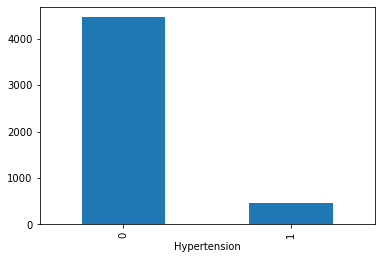

In [16]:
#Lets have a look at the number of people with hypetension
sizes = df1['hypertension'].value_counts(sort = True)
ax = plt.figure()
sizes.plot(kind='bar')
plt.xlabel('Hypertension')

Text(0.5, 0, 'Heart disease')

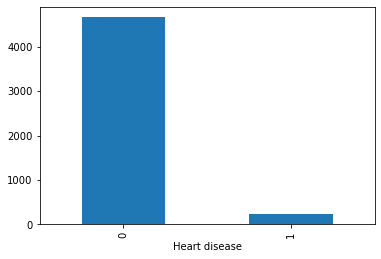

In [18]:
#Lets have a look at the number of people with heart disease
sizes = df1['heart_disease'].value_counts(sort = True)
ax = plt.figure()
sizes.plot(kind='bar')
plt.xlabel('Heart disease')

Text(0.5, 0, 'Stroke')

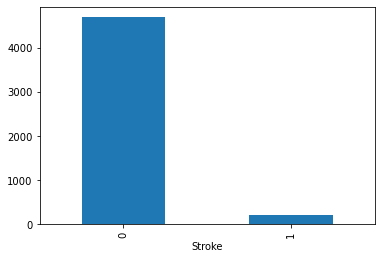

In [17]:
#Lets have a look at the number of people with stroke
sizes = df1['stroke'].value_counts(sort = True)
ax = plt.figure()
sizes.plot(kind='bar')
plt.xlabel('Stroke')

In [28]:
list= df1[(df1['hypertension'] == 1) & (df1['heart_disease'] == 1) & (df1['stroke'] == 1)]
list

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
115,53401,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1
143,37651,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1
184,28378,Male,61.0,1,1,Yes,Private,Urban,112.24,37.4,smokes,1
187,67895,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
193,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
201,68627,Male,80.0,1,1,Yes,Private,Urban,175.29,31.5,formerly smoked,1
217,29552,Female,55.0,1,1,Yes,Private,Urban,210.40,40.0,smokes,1
220,20463,Male,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1


In [43]:
#Of the people who have hypertension what percentage also has stroke and heart disease 
num_h_h_s=list['id'].count()
hypertension= df1[(df1['hypertension'] == 1)]
total_h= hypertension['id'].count()
percentage_h_h_s= num_h_h_s/total_h *100
percentage_h_h_s

2.4390243902439024

11

451